- 머신러닝: 데이터를 기반으로 학습을 시켜 예측을 하게 만드는 기법

1. 지도학습
   - 문제(X) = 독립변수, feature, 특성 등
   - 답(y) = 종속변수, target, label
2. 비지도학습
   - 문제
3. 강화학습
   - 보상을 얻어가는 방향으로

- 머신러닝 과정
(1) 문제정의
(2) 수집
(3) 전처리
(4) EDA(탐색적 데이터 분석)
(5) 모델선택, 하이퍼파라미터 조정
(6) 모델학습
(7) 모델평가
   - 일반화 train up test up
   - 과대적합 train up test down
   - 과소적합 train down test down

### Decision Tree(의사결정 나무)
- 스무고개 하듯이 True/False 질문을 반복하며 학습
- 특정 기준(질문, node)에 따라 데이터를 구분하는 모델
- 분류나 회귀 모두 사용 가능
- 구성요소
  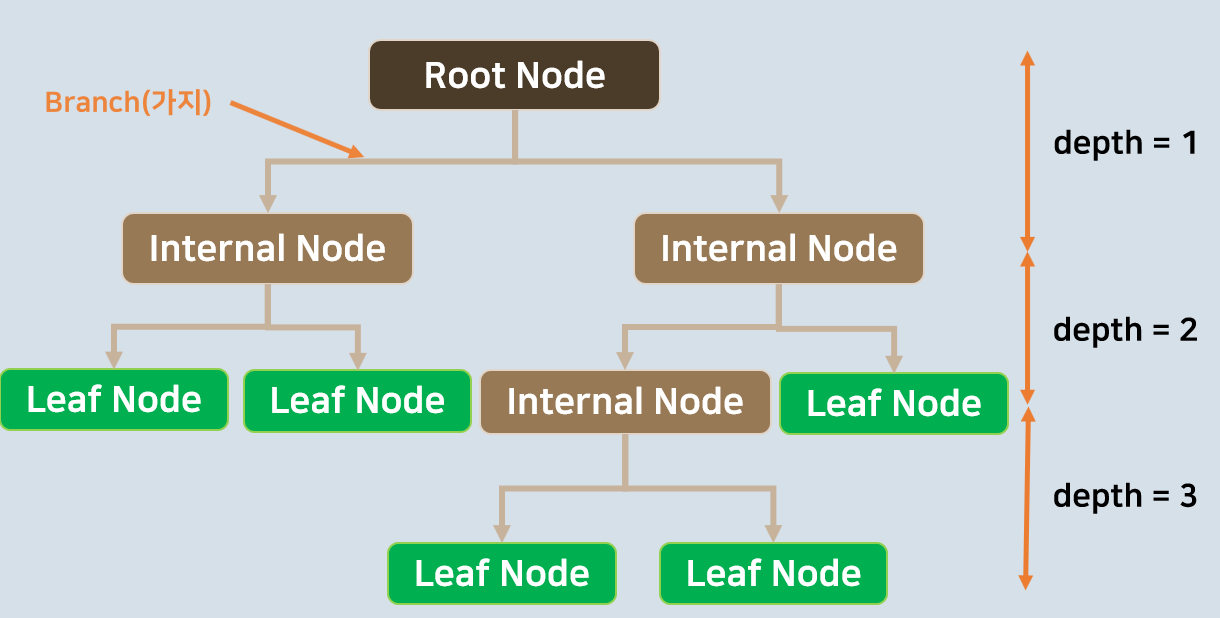

In [9]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 분리하는 도구
from sklearn.model_selection import train_test_split

#### 1. 문제정의
- 버섯 데이터를 활용해서 독성/식용 버섯을 분류

#### 2. 데이터 수집

In [10]:
data = pd.read_csv('./data/mushroom.csv')
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [11]:
# 데이터 크기 확인
data.shape
# 특성 22ea + 정답 1ea

(8124, 23)

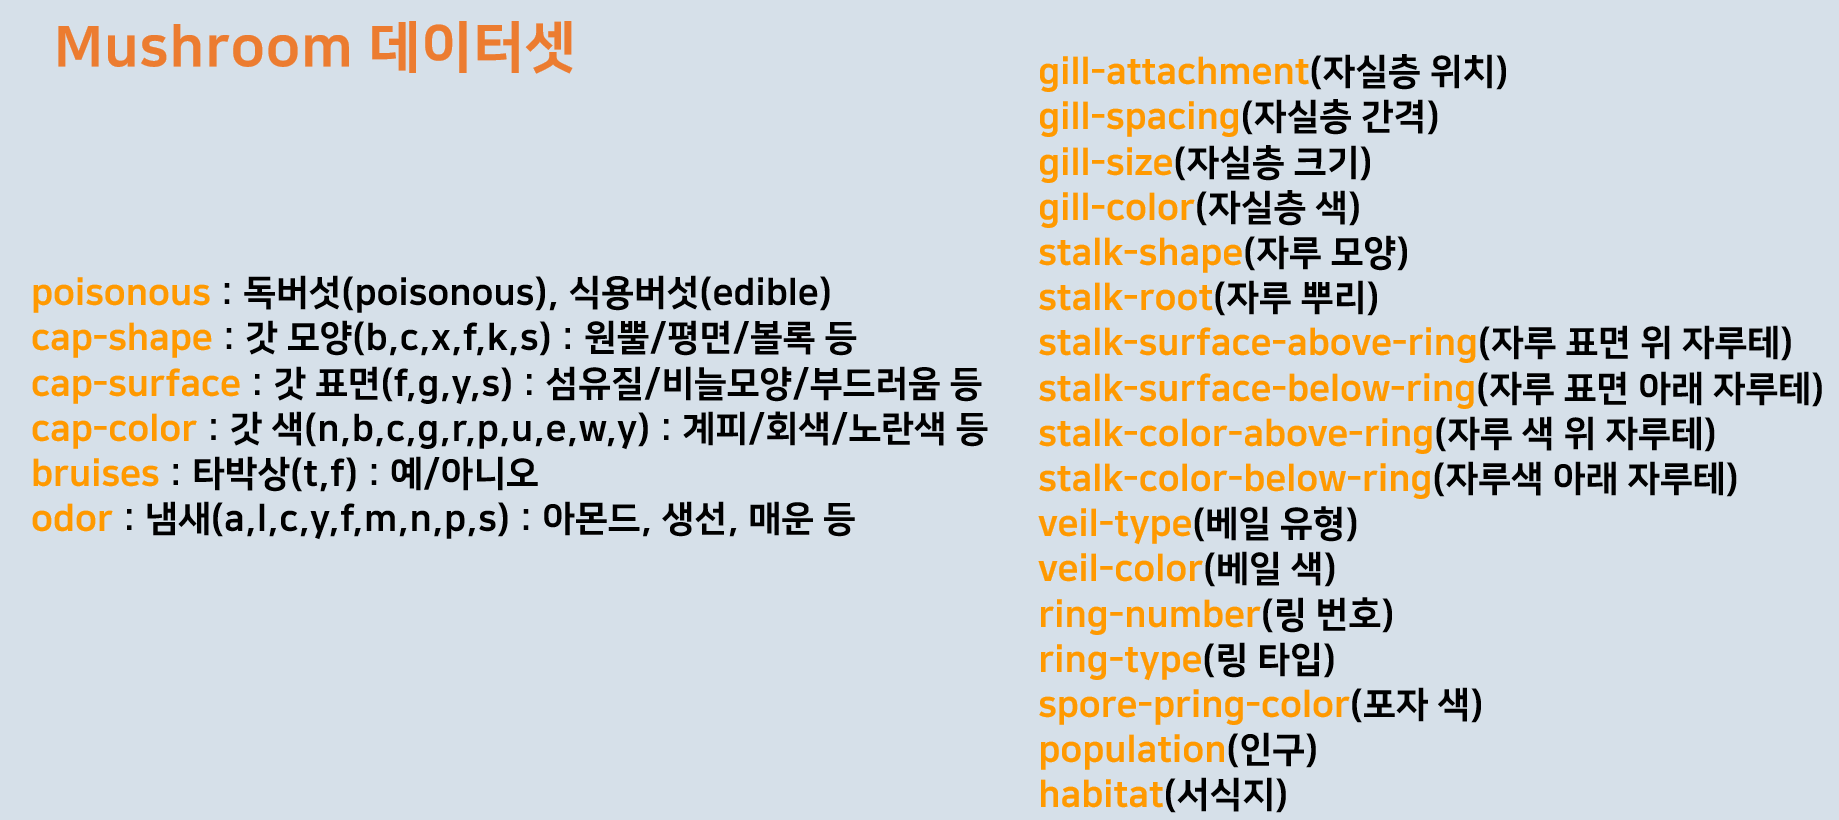

In [12]:
data.info()
# 결측치 없음 => 별도로 전처리 X
# sklearn 모델들은 문자열값을 입력으로 허용하지 않는다! 
# 데이터 타입 확인 시 object -> int, float 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
data.drop('poisonous' , axis=1)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [15]:
# X, y 데이터 분리해서 변수에 담기 
X = data.drop('poisonous' , axis=1)
y = data['poisonous']

In [16]:
X.shape, y.shape

((8124, 22), (8124,))

In [17]:
y.value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

In [18]:
# X의 기술통계량(요약본) 확인
X.describe().T

# count : 데이터 개수 
# unique : 고유값 개수 
# top : 가장 많은 개수의 데이터
# freq : 가장 많은 개수의 문자열의 빈도수 

,count,unique,top,freq
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728
stalk-shape,8124,2,t,4608


#### 데이터 전처리 
- 결측치 대체, 제거 
- 이상치 대체, 제거 
- 변수처리 
    - 인코딩 : 범주형 데이터를 숫자형으로 변환
    - label encoding : 수치값으로 mapping 하는 작업 (짝지어줌)
    - ont_hot encoding : 0 or 1의 값을 가진 여러 개의 새로운 ㄴ특성으로 변경하는 작업 (실제로 컬럼이 늘어남)
- train, test 분리 

In [19]:
# label encoding 
# 바뀌어진 숫자값들의 높고 낮음에 의미가 필요할 때 
X['cap-shape'].map({'x':0, 'f':1, 'k':2, 'b':3, 's':4, 'c':5})

0       0
1       0
2       3
3       0
4       0
       ..
8119    2
8120    0
8121    1
8122    2
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [20]:
# one_hot encoding
# 바뀌어진 숫자값들의 높고 낮음에 의미가 필요하지 않을 때 
# 데이터의 unique 개수만큼 컬럼을 추가
# 1 or 0 

X_one_hot = pd.get_dummies(X)
X_one_hot
# 데이터 값의 각 uniqueㅇ의 개수만큼 컬럼의 개수가 늘어남
# 총 컬럼의 수 22ea => 117ea

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


#### train, test 분리

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, 
                                                    test_size=0.3, 
                                                    random_state=1221, 
                                                    stratify=y)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((5686, 117), (2438, 117), (5686,), (2438,))

#### 모델링

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
tree1 = DecisionTreeClassifier()
tree1.fit(X_train, y_train)

# score() : 모델 자체적으로 제공하는 성능 평가 지표 
tree1.score(X_test, y_test)

1.0

### 모델링 + 하이퍼파라미터
- max_depth : 최대 리프 노드 지정
- max_leaf_nodes : 최대 리프 노드의 수 지정
- max_samples_split : 노드를 분할하기 위한 최소 샘플 수를 지정
  -  짖ㅈ정한 값 보다 적은 샘플을 자기저 노드믄 분영 ㅡ이ㅕㄴ 엇음 
  -  지정한 값보다 적은 샘플을 가지는 노드는 분할 되지 않음 
- max_samples_leaf : 리프노드가 가져야 하는 최소 샘플 수를 지정
  - 분할 전에 지정한 값보다 적은 샘플을 가진 노드가 나오는 경우 분할 방지

In [25]:
tree2 = DecisionTreeClassifier(max_depth=  3)

In [26]:
tree2.fit(X_train, y_train)
tree2.score(X_test,y_test)

0.9860541427399507

### tree 모델 내부 시각화

In [27]:
# graphviz 설치

!pip install graphviz

In [28]:
from sklearn.tree import export_graphviz # 내보내기용 도구

export_graphviz(tree1, # 확인할 모델
                out_file='./data/tree1.dot', # 경로, 파일명 확장자
                class_names=['독', '식용'],  # 정답데이터 이름 설정
                feature_names=X_one_hot.columns, # 컬럼이름 설정
                impurity=True, # 불순도 출력 여부 
                filled=True) # 각 노드들의 클래스가 구분되도록 색을 칠해주는 명령
# 학습된 tree1 모델의 정보가 들어있는 dot 파일을 생성

In [29]:
import graphviz

with open('./data/tree1.dot', encoding='UTF-8') as f :
    dot_graph = f.read() # 번수 선언해서 파일을 읽어오기

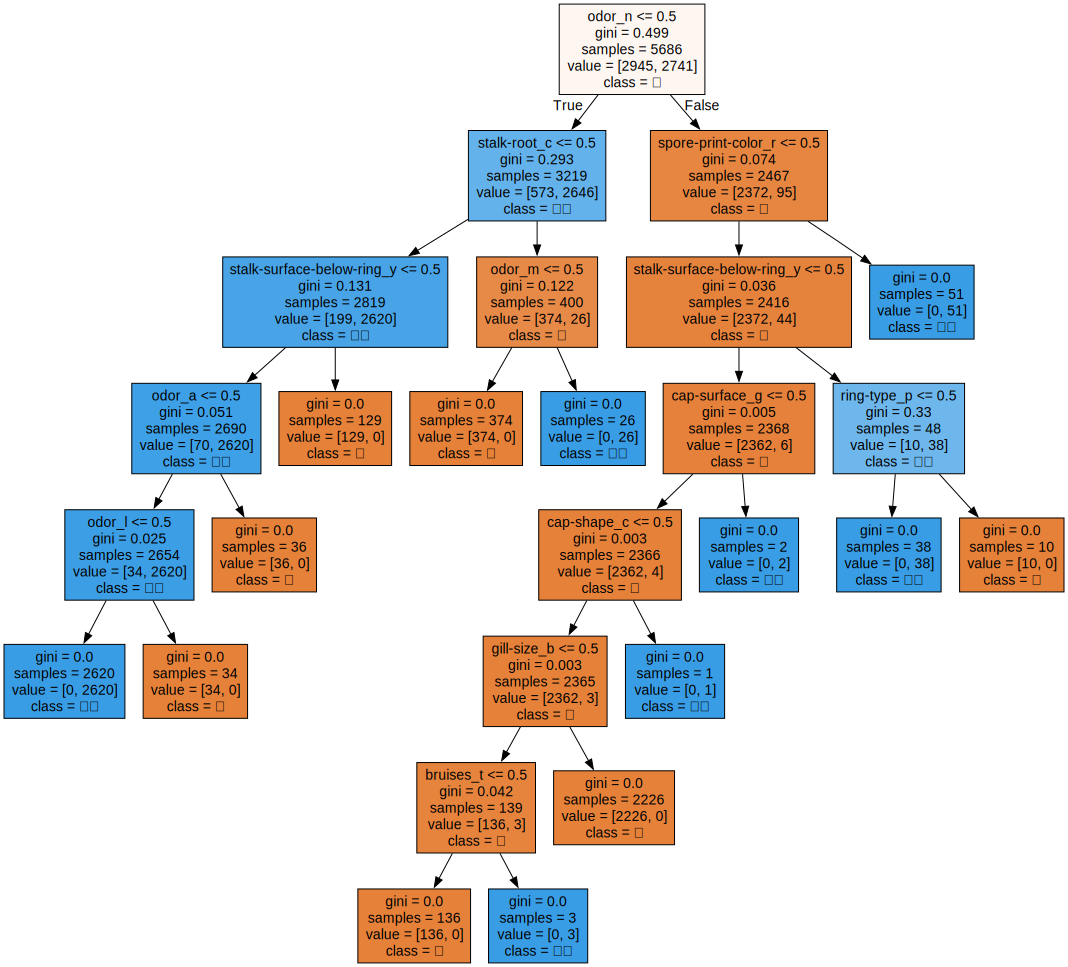

In [30]:
graphviz.Source(dot_graph)

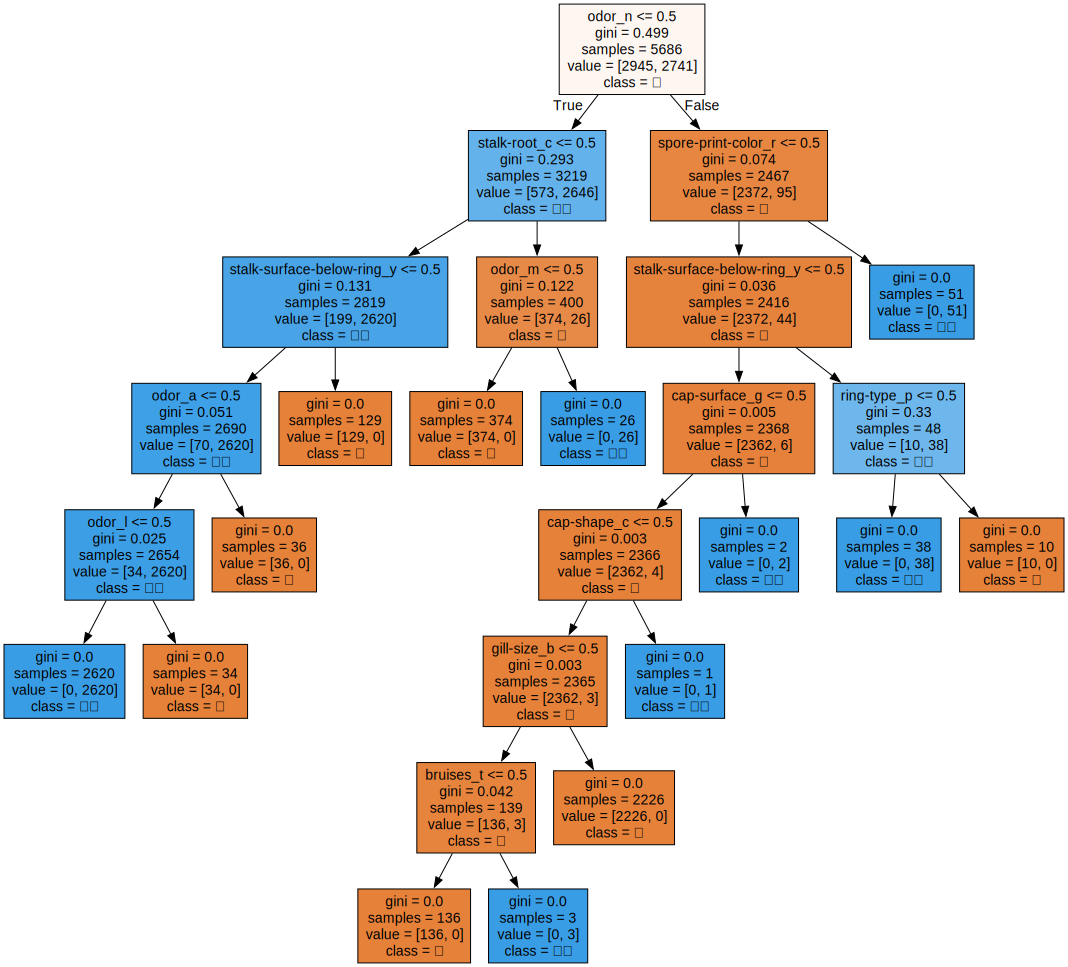

In [31]:
display(graphviz.Source(dot_graph))

#### 5  tree 모델 장 단점
- 결과 해석에 용이함
- 수치형, 범주형 데이터 모두 처리 가능
- 각 feature별로 스케일링이나 정규화가 별도로 필요하지 않음
- 특성 중요도를 제공 > 특성 선택

#### 특성 선택
- 데이터의 특성 중요도를 활용하여 '특성 선택' 가능!
- 특성들이 정답에 영향을 미치는 정도를 수치화해서 확인 가능
- 0~1 사이의 값을 가지고, 총합은 1 (1에 가까울수록 중요한 특성)
- tree 모델에서는 특성 중요도가 높은 값(불순도가 낮은 컬럼)을 최상단의 질문으로 배치

In [32]:
pd.set_option('display.max_seq_items',None)

X_one_hot.columns.sort_values(0,ascending=False)
# tree 모델에서 특성 중요도를 확인
fi = tree2.feature_importances_
pd.DataFrame(fi).sort_values(0,ascending=False)

# 인덱스명을 컬럼명으로 변경
fi_df = pd.DataFrame(fi,index=X_one_hot.columns, columns=['특성중요도'])
fi_df.sort_values('특성중요도',ascending=False)

,특성중요도
odor_n,0.640948
stalk-root_c,0.195681
stalk-surface-below-ring_y,0.109204
spore-print-color_r,0.035992
stalk-color-below-ring_c,0.018174
...,...
gill-size_b,0.000000
gill-spacing_w,0.000000
gill-spacing_c,0.000000
gill-attachment_f,0.000000
